# F1 CONSTRUCTORS - Descriptive Analytics

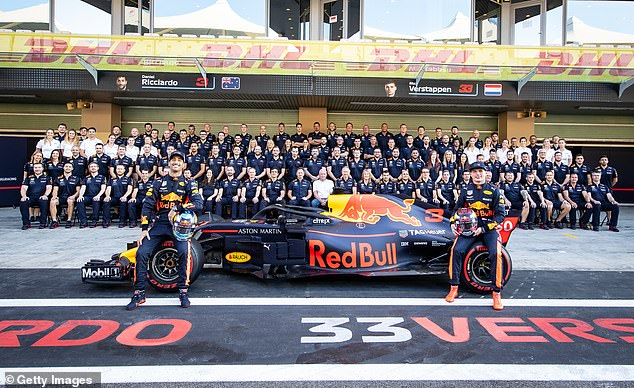

# Red Bull Racing

For this SQL/Python demonstration, we generate **3 Sets of Statistics** on **Red Bull Racing 2018 Season**:

- Driver Statistics - Comparison of Red Bull drivers, Daniel Ricciardo and Max Verstappen. 

- Constructor Results - Red Bull's constructor results by each *Grand Prix* advancement.

- Constructor Standings - Red Bull's constructor standing by each *Grand Prix* advancement. 

We also utilize visualization tools to assist us in analyzing the above statistics. 

Dataset: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

#### Composed by: ilin3ccc.GITHUB
***

## Course of Action

1. Prepare Modules / Connect to Db2 Cloud Database 

2. Understand the Data

3. Data Wrangling in SQL to create 3 sets of tables: Driver Statistics / Constructor Results / Constructor Standings

## 1. Prepare Modules / Connect to Db2 Cloud Database

In [1]:
# Cloud connection / SQL manipulation
!pip install ibm_db
!pip install ibm_db_sa
!pip install sqlalchemy

# Pandas / Matplotlib for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%load_ext sql

#%sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
%sql ibm_db_sa://xgk36114:miura@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB?security=SSL

## 2. Understand the Data

We familiar ourselves with [F1 World Championship Rules & Regulations](https://www.fia.com/regulation/category/110). Then, we understand the dataset by mapping out its data-structure. 

## 3. Data Wrangling in SQL

#### Create *Driver Statistics* table:
- INNER JOIN of results.csv, races.csv, drivers.csv, and constructors.csv.
- Selection/Arrangement of relevent headings. 

In [2]:
%%sql SELECT resultID, code,constructors.name, year, date, races.time, round, races.name, grid, laps, results.time, fastestlap, fastestlaptime, positiontext as Position, points

FROM results
INNER JOIN races on results.raceID = races.raceID
INNER JOIN drivers on results.driverID = drivers.driverID
INNER JOIN constructors on results.constructorID = constructors.constructorID

WHERE year = '2018'
ORDER BY resultID
LIMIT 20

 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.


resultid,code,name,YEAR,DATE,TIME,round,name_1,grid,laps,TIME_1,fastestlap,fastestlaptime,POSITION,points
23782,VET,Ferrari,2018,2018-03-25,05:10:00,1,Australian Grand Prix,3,58,1:29:33.283,53,1:26.469,1,25
23783,HAM,Mercedes,2018,2018-03-25,05:10:00,1,Australian Grand Prix,1,58,+5.036,50,1:26.444,2,18
23784,RAI,Ferrari,2018,2018-03-25,05:10:00,1,Australian Grand Prix,2,58,+6.309,57,1:26.373,3,15
23785,RIC,Red Bull,2018,2018-03-25,05:10:00,1,Australian Grand Prix,8,58,+7.069,54,1:25.945,4,12
23786,ALO,McLaren,2018,2018-03-25,05:10:00,1,Australian Grand Prix,10,58,+27.886,57,1:26.978,5,10
23787,VER,Red Bull,2018,2018-03-25,05:10:00,1,Australian Grand Prix,4,58,+28.945,54,1:26.880,6,8
23788,HUL,Renault,2018,2018-03-25,05:10:00,1,Australian Grand Prix,7,58,+32.671,57,1:27.081,7,6
23789,BOT,Mercedes,2018,2018-03-25,05:10:00,1,Australian Grand Prix,15,58,+34.339,54,1:27.019,8,4
23790,VAN,McLaren,2018,2018-03-25,05:10:00,1,Australian Grand Prix,11,58,+34.921,57,1:26.958,9,2
23791,SAI,Renault,2018,2018-03-25,05:10:00,1,Australian Grand Prix,9,58,+45.722,51,1:27.944,10,1


We interpret the 4th row of data **(ID 23785)** as such: 

**Daniel Ricciardo (RIC)** of team **Red Bull**, participated in the **1st round** of **2018** races in **Australia** on **March 25**. His **starting position on the grid was 8th**. He completed **58 laps**, **7.069 seconds** after winner Sebastian Vettel (VET) crossed the finish line at 1:29:33.283. His best lap time was **1:25.945** which was his **54th lap**. He finished **4th** in the race and gained **12 points** for team Red Bull.  

We interpret the 6th row of data (ID 23787) as such: 

Max Verstappen (VER) of team Red Bull, participated in the 1st round of races in Australia on March 25, 2018. His starting position on the grid was 4th. He completed 58 laps, 28.945 seconds after winner Sebastian Vettel (VET) crossed the finish line at 1:29:33.283. His best lap time was 1:26.880 which was his 54th lap. He finished 6th in the race and gained 8 points for team Red Bull.  
***

We perform data wrangling by merging 2 dataframes, keeping only data needed for analysis. 'RIC' represents championship points earned each round by Daniel and 'VER' represents Max, respectively. 

In [3]:
# SQL string
drivers_stats = %sql SELECT resultID, code,constructors.name as constructor, year, date, races.time, round, races.name, grid, positiontext as Position, points, laps, results.time, fastestlap, fastestlaptime FROM results INNER JOIN races on results.raceID = races.raceID INNER JOIN drivers on results.driverID = drivers.driverID INNER JOIN constructors on results.constructorID = constructors.constructorID WHERE constructors.name = 'Red Bull' AND year = '2018' ORDER BY resultID

# Pandas dataframe
df_driver_stats = drivers_stats.DataFrame()
df_driver_stats_RIC = df_driver_stats[df_driver_stats.code == 'RIC'] #Daniel's stats
df_driver_stats_VER = df_driver_stats[df_driver_stats.code == 'VER'] #Max's stats 

# We drop all unnecessary columns by choosing specific variables for our analysis.
df_RIC = df_driver_stats_RIC.drop(df_driver_stats_RIC.columns.difference(['round', 'points']), axis=1)
df_VER = df_driver_stats_VER.drop(df_driver_stats_VER.columns.difference(['round', 'points']), axis=1)

# Reset indices to 'round'
df_RIC.index = df_RIC['round']
df_VER.index = df_VER['round']

# Renamed heading
df_RIC = df_RIC.rename(columns={'points': 'RIC'}) 

# We merge the two tables
df_RIC['VER'] = df_VER['points']

df_RV = df_RIC
del df_RV['round']
df_RV

 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.


,RIC,VER
round,,
1,12,8
2,0,0
3,25,10
4,0,0
5,10,15
6,25,2
7,12,15
8,12,18
9,0,25


We visualize above dataframe to show points awarded to Daniel and Max through 21 races in 2018. 

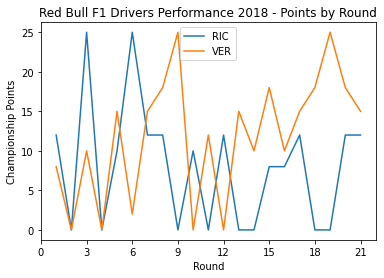

In [4]:
from matplotlib.ticker import MaxNLocator

# Integers only on x-axis.
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

RV = df_RV.index
RP = df_RV['RIC']
VP = df_RV['VER']

sns.lineplot(x = RV, y = RP).set(title='Red Bull F1 Drivers Performance 2018 - Points by Round')
sns.lineplot(x = RV, y = VP)


ax.set(xlabel='Round', ylabel='Championship Points') # X/Y labels
plt.legend(labels=["RIC","VER"])# Included a legend
plt.show()

**INSIGHTS**: We can clearly see that Daniel performed better in the beginning of the season with 2 wins (25 points each). While Max's performance was not as good in the beginning, eventually he managed to score more points than Dainel in every race from round 13 onward. 

#### Create *Constructor Results* table:
- INNER JOIN of constructor_results.csv, constructors, races.csv, and circuits.csv.
- Selection/Arrangment of relevent headings. 
- Added 'running total' column.

In [5]:
%%sql SELECT constructorresultsId, year, date, constructors.name as constructor, races.name, circuits.name as Circuit_name, circuits.country, round, constructor_results.points,

SUM (points) OVER (ORDER BY round) as Total

FROM constructor_results
INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID
INNER JOIN races ON constructor_results.raceID = races.raceID
INNER JOIN circuits ON races.circuitID = circuits.circuitID

WHERE year = '2018' AND
constructors.name = 'Red Bull'

ORDER BY date
LIMIT 30

 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.


constructorresultsid,YEAR,DATE,constructor,name,circuit_name,country,round,points,total
15642,2018,2018-03-25,Red Bull,Australian Grand Prix,Albert Park Grand Prix Circuit,Australia,1,20,20
15659,2018,2018-04-08,Red Bull,Bahrain Grand Prix,Bahrain International Circuit,Bahrain,2,0,20
15660,2018,2018-04-15,Red Bull,Chinese Grand Prix,Shanghai International Circuit,China,3,35,55
15679,2018,2018-04-29,Red Bull,Azerbaijan Grand Prix,Baku City Circuit,Azerbaijan,4,0,55
15681,2018,2018-05-13,Red Bull,Spanish Grand Prix,Circuit de Barcelona-Catalunya,Spain,5,25,80
15690,2018,2018-05-27,Red Bull,Monaco Grand Prix,Circuit de Monaco,Monaco,6,27,107
15702,2018,2018-06-10,Red Bull,Canadian Grand Prix,Circuit Gilles Villeneuve,Canada,7,27,134
15711,2018,2018-06-24,Red Bull,French Grand Prix,Circuit Paul Ricard,France,8,30,164
15720,2018,2018-07-01,Red Bull,Austrian Grand Prix,Red Bull Ring,Austria,9,25,189
15732,2018,2018-07-08,Red Bull,British Grand Prix,Silverstone Circuit,UK,10,10,199


We create pandas dataframe for the above data. We also do this for **5 other high performing constructors: Ferrari, Mercedes, Renault, Haas F1 Team, and McLaren**.

In [6]:
standings_rb = %sql SELECT round, SUM (points) OVER (ORDER BY round) as Total FROM constructor_results INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID INNER JOIN races ON constructor_results.raceID = races.raceID INNER JOIN circuits ON races.circuitID = circuits.circuitID WHERE year = '2018' AND constructors.name = 'Red Bull' ORDER BY date
standings_f = %sql SELECT round, SUM (points) OVER (ORDER BY round) as Total FROM constructor_results INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID INNER JOIN races ON constructor_results.raceID = races.raceID INNER JOIN circuits ON races.circuitID = circuits.circuitID WHERE year = '2018' AND constructors.name = 'Ferrari' ORDER BY date
standings_m = %sql SELECT round, SUM (points) OVER (ORDER BY round) as Total FROM constructor_results INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID INNER JOIN races ON constructor_results.raceID = races.raceID INNER JOIN circuits ON races.circuitID = circuits.circuitID WHERE year = '2018' AND constructors.name = 'Mercedes' ORDER BY date
standings_r = %sql SELECT round, SUM (points) OVER (ORDER BY round) as Total FROM constructor_results INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID INNER JOIN races ON constructor_results.raceID = races.raceID INNER JOIN circuits ON races.circuitID = circuits.circuitID WHERE year = '2018' AND constructors.name = 'Renault' ORDER BY date
standings_h = %sql SELECT round, SUM (points) OVER (ORDER BY round) as Total FROM constructor_results INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID INNER JOIN races ON constructor_results.raceID = races.raceID INNER JOIN circuits ON races.circuitID = circuits.circuitID WHERE year = '2018' AND constructors.name = 'Haas F1 Team' ORDER BY date
standings_mc = %sql SELECT round, SUM (points) OVER (ORDER BY round) as Total FROM constructor_results INNER JOIN constructors ON constructor_results.constructorID = constructors.constructorID INNER JOIN races ON constructor_results.raceID = races.raceID INNER JOIN circuits ON races.circuitID = circuits.circuitID WHERE year = '2018' AND constructors.name = 'McLaren' ORDER BY date

#Red Bull
df_standings_rb = standings_rb.DataFrame() 
#Ferrari
df_standings_f = standings_f.DataFrame() 
#Mercedes
df_standings_m = standings_m.DataFrame() 
#Renault
df_standings_r = standings_r.DataFrame() 
#Haas F1 Team
df_standings_h = standings_h.DataFrame()
#McLaren
df_standings_mc = standings_mc.DataFrame()


 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.
 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.
 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.
 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.
 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.
 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.


We visualize Red Bull's performance in obtaining championship points, in relation to Ferrari, Mercedes, Renault, Haas F1 Team, and McLaren as well. 

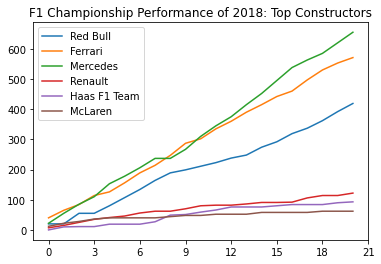

In [7]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(df_standings_rb.total)
plt.plot(df_standings_f.total)
plt.plot(df_standings_m.total)
plt.plot(df_standings_r.total)
plt.plot(df_standings_h.total)
plt.plot(df_standings_mc.total)

plt.title('F1 Championship Performance of 2018: Top Constructors')
plt.legend(labels=["Red Bull","Ferrari","Mercedes", "Renault", "Haas F1 Team", "McLaren"])

**INSIGHTS**: There is relative consistency in each constructor' s performance, judging by the trend of each line. Red Bull maintained 3rd position mostly throughout the entire season (see table below). Mercedes battled and eventually secured 1st place from Ferrari. Renault, Haas, and McLaren seem to be more similar in terms of perfromance as seen from their closeness in the chart. 

#### Create *Constructor Results* table:
- INNER JOIN of constructor_standings.csv, races.csv, circuits.csv, and constructors.csv. 
- Selection/Arrangement of relevant headings.

In [8]:
%%sql Select constructorstandingsID,
year, constructors.name as constructor, round, races.name, circuits.name, constructor_standings.points as accumulated_points, position

FROM constructor_standings
INNER JOIN races on constructor_standings.raceID = races.raceID
INNER JOIN circuits on races.circuitID = circuits.circuitID
INNER JOIN constructors on constructor_standings.constructorID = constructors.constructorID

WHERE 
year = '2018' AND
constructors.name = 'Red Bull'

ORDER BY date

 * ibm_db_sa://xgk36114:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/BLUDB
Done.


constructorstandingsid,YEAR,constructor,round,name,name_1,accumulated_points,POSITION
26935,2018,Red Bull,1,Australian Grand Prix,Albert Park Grand Prix Circuit,20,3
26975,2018,Red Bull,2,Bahrain Grand Prix,Bahrain International Circuit,20,4
26965,2018,Red Bull,3,Chinese Grand Prix,Shanghai International Circuit,55,3
26985,2018,Red Bull,4,Azerbaijan Grand Prix,Baku City Circuit,55,3
26995,2018,Red Bull,5,Spanish Grand Prix,Circuit de Barcelona-Catalunya,80,3
27005,2018,Red Bull,6,Monaco Grand Prix,Circuit de Monaco,107,3
27015,2018,Red Bull,7,Canadian Grand Prix,Circuit Gilles Villeneuve,134,3
27025,2018,Red Bull,8,French Grand Prix,Circuit Paul Ricard,164,3
27035,2018,Red Bull,9,Austrian Grand Prix,Red Bull Ring,189,3
27045,2018,Red Bull,10,British Grand Prix,Silverstone Circuit,199,3
